In [1]:
import tensorflow
import keras
import os
import glob
from skimage import io
import random
import numpy as np
import matplotlib.pyplot  as plt
import skimage
%matplotlib inline

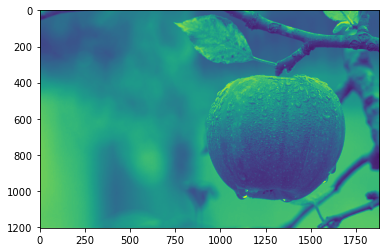

In [3]:
# accessing the image
image = io.imread('sampleImage.jpeg')

#plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

In [4]:
# 2 channels to 3 channels
print(image.shape)  # (64, 224, 224)
rgb_batch = np.repeat(image[..., np.newaxis], 3, -1)
print(rgb_batch.shape)  # (64, 224, 224, 3)

(1204, 1880)
(1204, 1880, 3)


Text(0.5, 0.98, 'Original and RGB image channels')

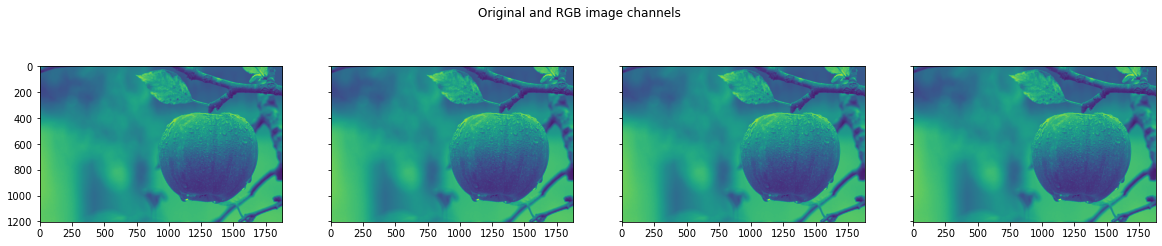

In [5]:
#Plotting original and RGB channels

i, (im1,im2,im3,im4) = plt.subplots(1,4, sharey=True)
i.set_figwidth(20)

im1.imshow(image) # original image
im2.imshow(rgb_batch[:,:,0]) #Red
im3.imshow(rgb_batch[:,:,1]) #Green
im4.imshow(rgb_batch[:,:,2]) #Blue
i.suptitle('Original and RGB image channels')

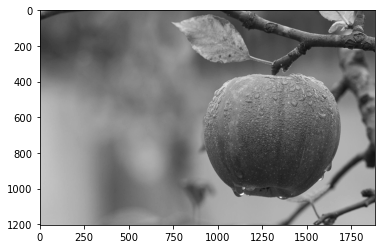

In [6]:
# converting gray image

gray_image = skimage.color.rgb2gray(rgb_batch)
plt.imshow(gray_image, cmap='gray')

## Normalization

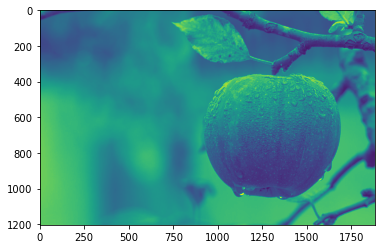

In [7]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

## Shifting

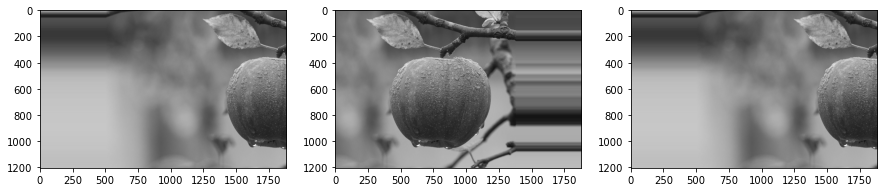

In [8]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# convert to numpy array
data = img_to_array(rgb_batch)

#expand dimensions to one sample
samples = expand_dims(rgb_batch, 0)

# create  image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-500,500])

#Create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

#generate batch of images
for i in range(3):
    
    #convert to unsigned integers
    image = next(it)[0].astype('uint8')
    
    #plot image
    im[i].imshow(image)

## Flipping

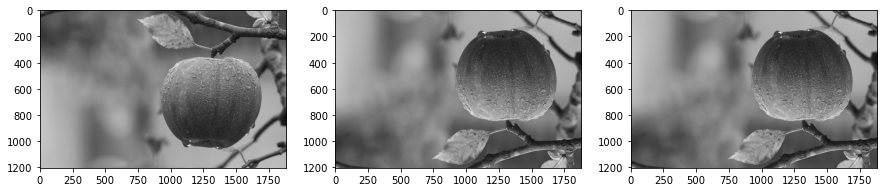

In [9]:
# convert to numpy array
data = img_to_array(rgb_batch)

#expand dimensions to one sample
samples = expand_dims(rgb_batch, 0)

# create  image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

#Create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

#generate batch of images
for i in range(3):
    
    #convert to unsigned integers
    image = next(it)[0].astype('uint8')
    
    #plot image
    im[i].imshow(image)

## Rotation

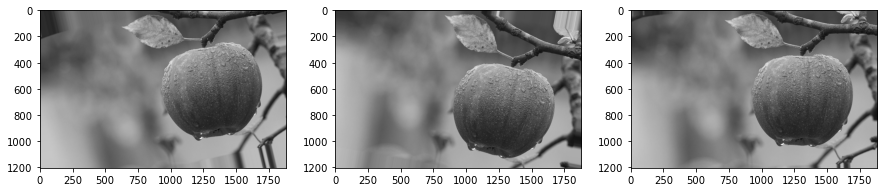

In [10]:
# convert to numpy array
data = img_to_array(rgb_batch)

#expand dimensions to one sample
samples = expand_dims(rgb_batch, 0)

# create  image data augmentation generator
datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')

#Create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

#generate batch of images
for i in range(3):
    
    #convert to unsigned integers
    image = next(it)[0].astype('uint8')
    
    #plot image
    im[i].imshow(image)

## Changing brightness

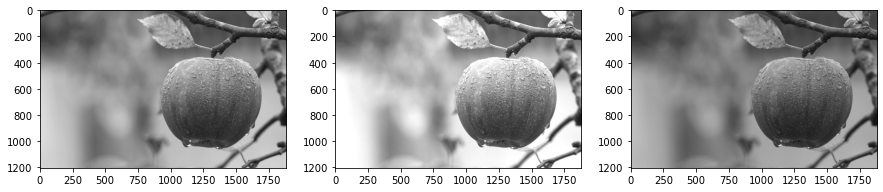

In [11]:
# convert to numpy array
data = img_to_array(rgb_batch)

#expand dimensions to one sample
samples = expand_dims(rgb_batch, 0)

# create  image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])

#Create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

#generate batch of images
for i in range(3):
    
    #convert to unsigned integers
    image = next(it)[0].astype('uint8')
    
    #plot image
    im[i].imshow(image)

## Standardizing images

E:\python3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
E:\python3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


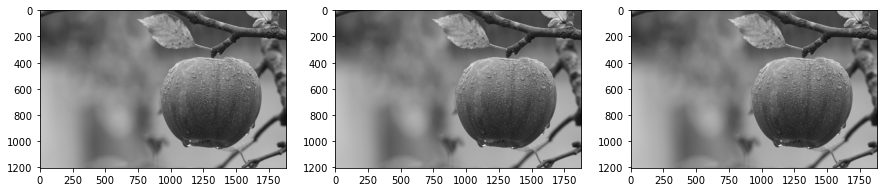

In [12]:
# convert to numpy array
data = img_to_array(rgb_batch)

#expand dimensions to one sample
samples = expand_dims(rgb_batch, 0)

# create  image data augmentation generator
datagen = ImageDataGenerator(featurewise_center = True, featurewise_std_normalization = True)

#Create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

#generate batch of images
for i in range(3):
    
    #convert to unsigned integers
    image = next(it)[0].astype('uint8')
    
    #plot image
    im[i].imshow(image)